<h1> Lecture 1 and 2(Data Cleaning)</h1>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df2 = df.drop(['availability','area_type','balcony','society'],axis='columns')

In [5]:
df2.shape

(13320, 5)

In [6]:
df2.dropna(inplace = True)

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df2['bedrooms'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [9]:
df2.drop(['size'],axis = 'columns',inplace = True)

In [10]:
df2[df2.bedrooms>20]

,location,total_sqft,bath,price,bedrooms
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [11]:
def range_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [12]:
df2['total_sqft'] = df2['total_sqft'].apply(range_to_float)

In [13]:
df2.dropna(inplace=True)

<h1>Lecture 3 (feature engineering)</h1>

In [14]:
df2['price_per_sqft'] = df2['price']/df2['total_sqft']

In [15]:
df2.head()

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,0.036998
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0.046154
2,Uttarahalli,1440.0,2.0,62.00,3,0.043056
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0.062459
4,Kothanur,1200.0,2.0,51.00,2,0.042500


In [16]:
df2.location = df2.location.apply(lambda x: x.strip())
all_location = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
all_location

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [17]:
locations_few = all_location[all_location<=10]

In [18]:
df2.location = df2.location.apply(
    lambda x: 'other' if x in locations_few else x
)

In [19]:
len(df2.location.unique())

241

<h1> Lecture 4 (outlier removal)</h1>

In [20]:
df2[df2.total_sqft/df2.bedrooms<300].shape,df2.shape

((744, 6), (13200, 6))

In [21]:
df3 = df2[~(df2.total_sqft/df2.bedrooms<300)]

In [27]:
df3.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 12456, dtype: object

In [83]:
def remove5percent(df):
    df_out = pd.DataFrame()
    
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        left = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out,left],ignore_index = True)
    
    return df_out

In [84]:
df4 = remove5percent(df3)
df4.shape,df3.shape

((10242, 6), (12456, 6))

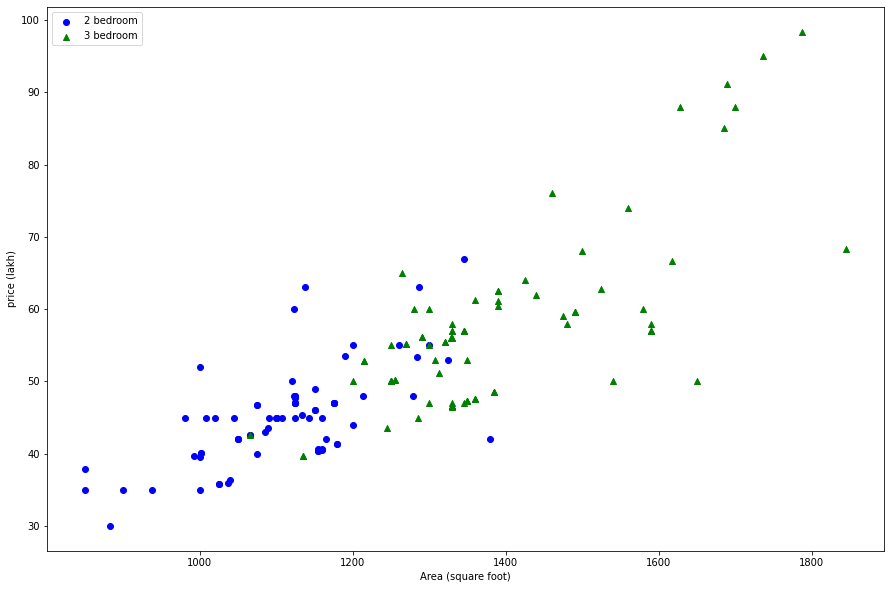

In [85]:
def plot_scatter_chart(df,location):
    bedroom2 = df[(df.location == location) & (df.bedrooms==2)]
    bedroom3 = df[(df.location == location) & (df.bedrooms==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bedroom2.total_sqft,bedroom2.price,color='blue',label='2 bedroom')
    plt.scatter(bedroom3.total_sqft,bedroom3.price,color='green',label='3 bedroom',marker='^')
    plt.xlabel('Area (square foot)')
    plt.ylabel('price (lakh)')
    plt.legend()

plot_scatter_chart(df4,'Uttarahalli')

In [86]:
df4.head()

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,0.150175
1,1st Block Jayanagar,1630.0,3.0,194.0,3,0.119018
2,1st Block Jayanagar,1875.0,2.0,235.0,3,0.125333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,0.108333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,0.119838


In [87]:
def remove_rooms_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        room_stats = dict()
        for room_number,room_df in location_df.groupby('bedrooms'):
            room_stats[room_number] = {
                'mean': np.mean(room_df.price_per_sqft),
                'std': np.std(room_df.price_per_sqft),
                'count': room_df.shape[0]
            }
            
        for room_number,room_df in location_df.groupby('bedrooms'):
            prev_stat = room_stats.get(room_number-1)
            if prev_stat and prev_stat['count']>5:
                exclude_indices = np.append(exclude_indices,room_df[room_df.price_per_sqft<(prev_stat['mean'])].index.values)
    
    return df.drop(exclude_indices,axis = 'index')
            

In [88]:
df5 = remove_rooms_outliers(df4)
df5.shape,df4.shape

((7317, 6), (10242, 6))

(array([ 548., 3580., 2299.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([0.013     , 0.0362098 , 0.05941961, 0.08262941, 0.10583922,
        0.12904902, 0.15225882, 0.17546863, 0.19867843, 0.22188824,
        0.24509804]),
 <BarContainer object of 10 artists>)

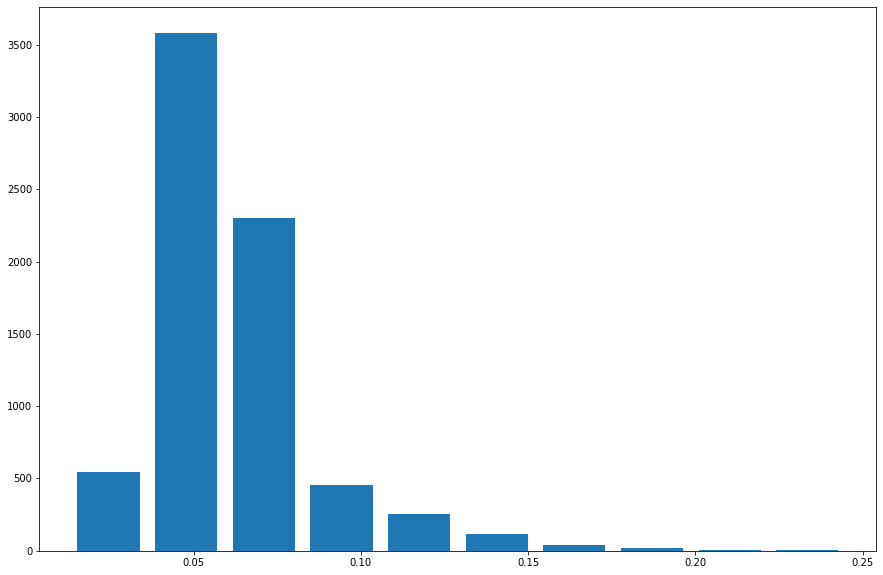

In [89]:
plt.hist(df5.price_per_sqft,rwidth=0.8)

In [90]:
df5.head()

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,0.150175
1,1st Block Jayanagar,1630.0,3.0,194.0,3,0.119018
2,1st Block Jayanagar,1875.0,2.0,235.0,3,0.125333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,0.108333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,0.119838


In [91]:
df5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [92]:
df5 = df5[df5.bath<df5.bedrooms+2]
df5.shape

(7239, 6)

In [93]:
df5.drop('price_per_sqft',axis='columns',inplace=True)

<h1> Lecture 5 model building</h1>

In [94]:
len(df5.location.unique())

241

In [170]:
df6 = pd.get_dummies(data=df5,columns=['location'],drop_first=True)
df6.shape

(7239, 244)

In [171]:
from sklearn.model_selection import train_test_split
X = df6.drop('price',axis='columns')
y = df6.price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [172]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8629132245229371

In [173]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.79731455, 0.8136812 , 0.88838724, 0.84520114, 0.80286368])

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    score = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=False)
    
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        
        score.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])


In [175]:
models_df = find_best_model(X,y)
models_df

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': True}
1,decision_tree,0.764591,"{'criterion': 'mse', 'splitter': 'best'}"


In [176]:
# linear regression model from df6
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [177]:
X.columns

Index(['total_sqft', 'bath', 'bedrooms', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar',
       'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=243)

In [178]:
def predict_price(location,area,bath,bedrooms):
    # here model is our fitted model
    location = location
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
    else:
        loc_index = np.where(X.columns=='other')[0][0]
    x = np.zeros(len(X.columns))
    x[0],x[1],x[2] = area,bath,bedrooms
    x[loc_index] = 1
    
    return model.predict([x])[0]

In [179]:
predict_price('Indira Nagar',1000,3,3)

195.52689759855778

In [180]:
df6.columns = [x.replace('location_','') for x in df6.columns]
X.columns = [x.replace('location_','') for x in X.columns]
df6.head()

,total_sqft,bath,price,bedrooms,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
df6.to_csv('modified_final_version.csv',index=False)

In [182]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))